# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score

# Data Understanding

In [ ]:
# import dataset
data=pd.read_csv("/content/case.csv")

In [ ]:
# check first rows
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,F,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,Friday,No-Show,0,0,0,0,1,0,0,0,-3
1,56,F,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,Thursday,No-Show,1,0,1,0,0,0,0,1,-17
2,27,F,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-21
3,24,M,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-34
4,48,F,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-23


In [ ]:
# check last rows
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,38,F,2015-10-20T08:33:56Z,2015-10-23T00:00:00Z,Friday,No-Show,0,0,0,0,1,0,0,0,-3
1,56,F,2014-02-03T10:05:26Z,2014-02-20T00:00:00Z,Thursday,No-Show,1,0,1,0,0,0,0,1,-17
2,27,F,2014-04-29T07:57:32Z,2014-05-20T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-21
3,24,M,2014-04-02T13:53:37Z,2014-05-06T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-34
4,48,F,2014-01-07T10:07:17Z,2014-01-30T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-23


In [ ]:
# check row and column number
data.shape

(210000, 15)

In [ ]:
# check column names
data.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [ ]:
# changing column names to lower case
data.columns=data.columns.str.lower()

In [ ]:
#check data types
data.dtypes

age                         int64
gender                     object
appointmentregistration    object
apointmentdata             object
dayoftheweek               object
status                     object
diabetes                    int64
alcoolism                   int64
hipertension                int64
handcap                     int64
smokes                      int64
scholarship                 int64
tuberculosis                int64
sms_reminder                int64
awaitingtime                int64
dtype: object

In [ ]:
#check null values
data.isnull().sum()

age                        0
gender                     0
appointmentregistration    0
apointmentdata             0
dayoftheweek               0
status                     0
diabetes                   0
alcoolism                  0
hipertension               0
handcap                    0
smokes                     0
scholarship                0
tuberculosis               0
sms_reminder               0
awaitingtime               0
dtype: int64

In [ ]:
# check unique values
data.apply(lambda x: x.nunique())

age                           107
gender                          2
appointmentregistration    207711
apointmentdata                533
dayoftheweek                    7
status                          2
diabetes                        2
alcoolism                       2
hipertension                    2
handcap                         5
smokes                          2
scholarship                     2
tuberculosis                    2
sms_reminder                    3
awaitingtime                  205
dtype: int64

In [ ]:
# check values of sms_reminder
data.sms_reminder.unique()

array([0, 1, 2])

In [ ]:
# change type of date columns
def date_type(x):
    return pd.to_datetime(x)
data.appointmentregistration, data.apointmentdata= date_type(data.appointmentregistration), date_type(data.apointmentdata)

In [ ]:
# changing valubes in awaitingtime column to absolute numbers
data.awaitingtime=data.awaitingtime.abs()

In [ ]:
data.awaitingtime

0          3
1         17
2         21
3         34
4         23
          ..
209995     1
209996     1
209997     9
209998    13
209999     2
Name: awaitingtime, Length: 210000, dtype: int64

In [ ]:
# check balance
data.status.value_counts(normalize=True)

Show-Up    0.696919
No-Show    0.303081
Name: status, dtype: float64

In [ ]:
# check statistics properities
data.describe()

,age,diabetes,alcoolism,hipertension,handcap,smokes,scholarship,tuberculosis,sms_reminder,awaitingtime
count,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000
mean,37.761824,0.077290,0.024676,0.214862,0.020471,0.052033,0.097738,0.000429,0.574238,13.833538
std,22.794334,0.267052,0.155137,0.410727,0.155854,0.222095,0.296961,0.020698,0.499776,15.685272
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
max,113.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,398.000000


# Data Analysis

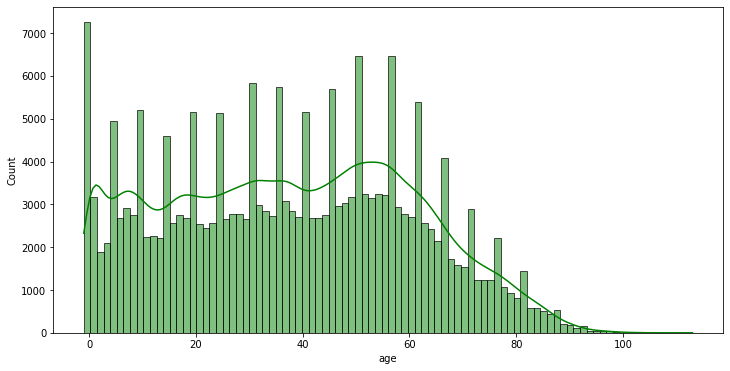

In [ ]:
#check distribuation in Age column 
plt.figure(figsize=(12, 6))
sns.histplot(data.age, color='green', kde=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


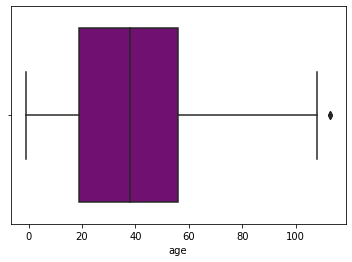

In [ ]:
# outliers in Age
sns.boxplot(data.age, color='purple')

In [ ]:
# create hour column
data['hour'] = data['appointmentregistration'].dt.hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


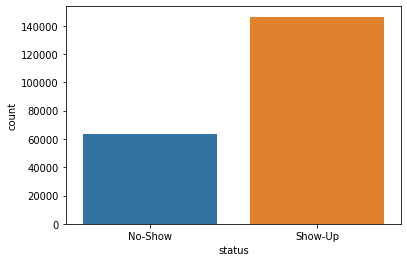

In [ ]:
#visualize status column
sns.countplot(data.status)

In [ ]:
#find columns with less than or equal to 7 unique values
columns=[]

for x in data.columns:
  if data[x].nunique()<=7:
      columns.append(x)

In [ ]:
print(columns, end='\n')

['gender', 'dayoftheweek', 'status', 'diabetes', 'alcoolism', 'hipertension', 'handcap', 'smokes', 'scholarship', 'tuberculosis', 'sms_reminder']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

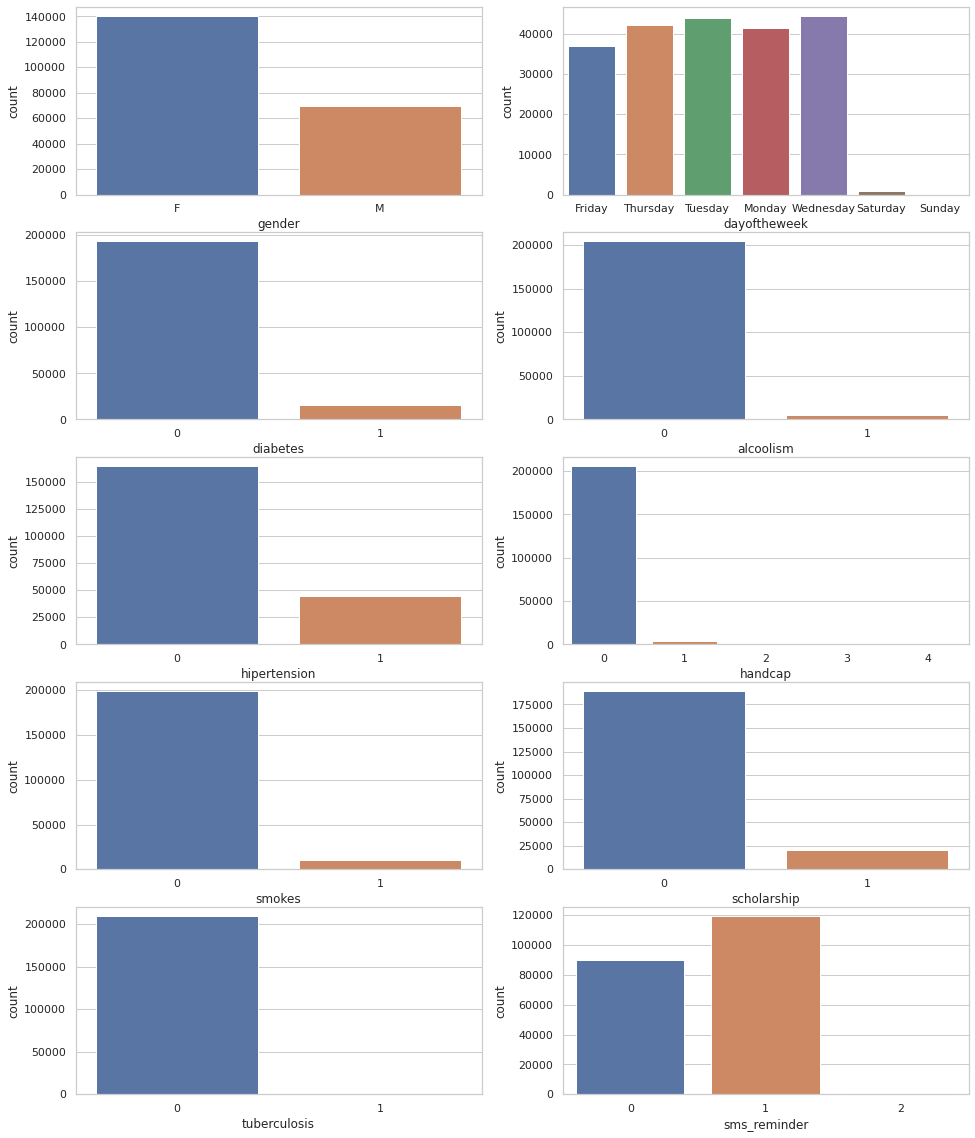

In [ ]:
# visualise proportions
prop_status={'gender':1, 'dayoftheweek':2, 'diabetes':3, 'alcoolism':4, 
             'hipertension':5, 'handcap':6, 'smokes':7, 'scholarship':8, 'tuberculosis':9, 'sms_reminder':10}

plt.figure(figsize=(16, 20))

for variable, i in prop_status.items():
  sns.set_theme(style="whitegrid")
  plt.subplot(5, 2, i)
  sns.countplot(data[variable] )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

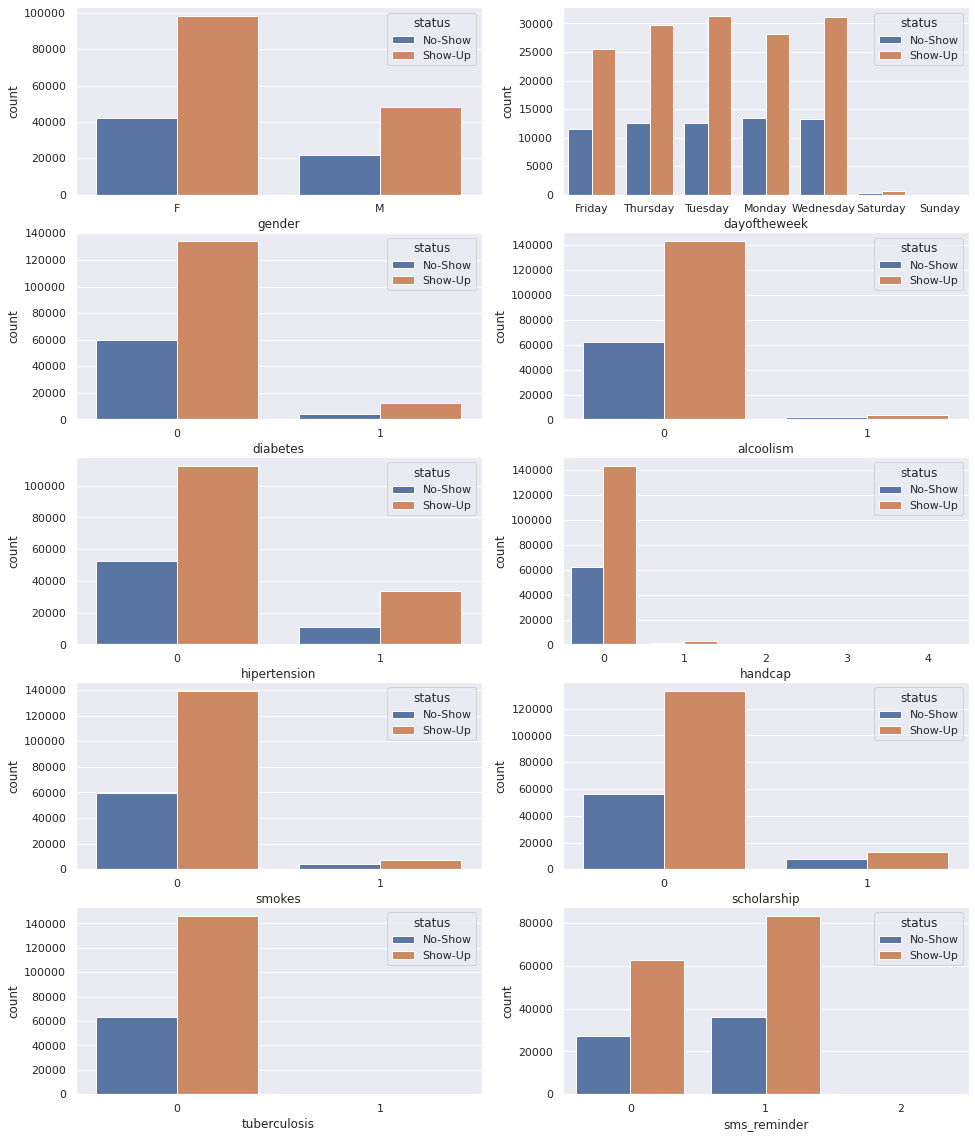

In [ ]:
#visualise proportion of Show-up and No-show through categoric variables
prop_status={'gender':1, 'dayoftheweek':2, 'diabetes':3, 'alcoolism':4, 
             'hipertension':5, 'handcap':6, 'smokes':7, 'scholarship':8, 'tuberculosis':9, 'sms_reminder':10}

plt.figure(figsize=(16, 20))

for variable, i in prop_status.items():
  sns.set_theme(style="darkgrid")
  plt.subplot(5, 2, i)
  sns.countplot(data[variable], hue=data.status)


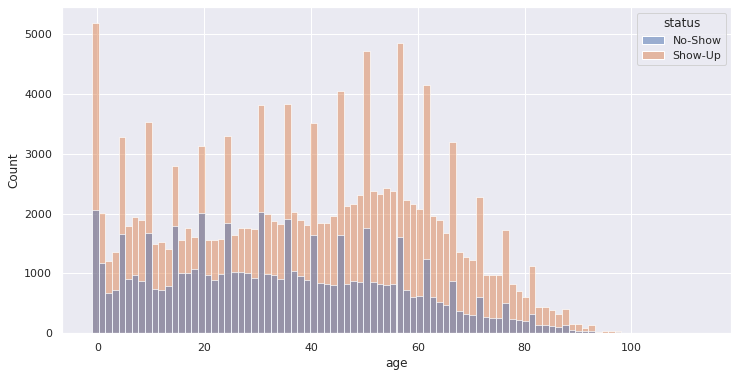

In [ ]:
#check distribuation of Status column through Age column 
plt.figure(figsize=(12, 6))
sns.histplot(x=data.age, color='green', hue=data.status)

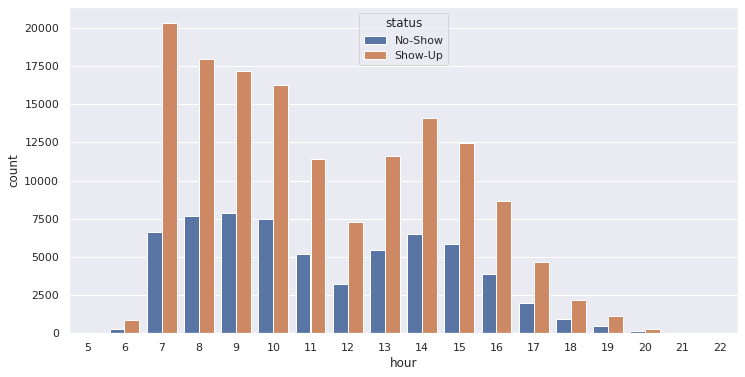

In [ ]:
#check distribuation of Status column through Hour column 
plt.figure(figsize=(12, 6))
sns.countplot(x=data.hour,  hue=data.status)

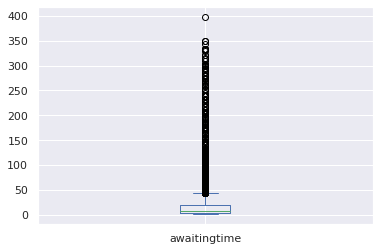

In [ ]:
data.awaitingtime.plot(kind='box')

# Data Preprocessing

In [ ]:
# drop date columns
data.drop(["appointmentregistration", "apointmentdata"], axis=1, inplace=True)

In [ ]:
# dummy variables
data=pd.get_dummies(data=data, columns=["gender", "dayoftheweek"])

In [ ]:
#encoding target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.status=le.fit_transform(data.status)

In [ ]:
data

,age,status,diabetes,alcoolism,hipertension,handcap,smokes,scholarship,tuberculosis,sms_reminder,...,hour,gender_F,gender_M,dayoftheweek_Friday,dayoftheweek_Monday,dayoftheweek_Saturday,dayoftheweek_Sunday,dayoftheweek_Thursday,dayoftheweek_Tuesday,dayoftheweek_Wednesday
0,38,0,0,0,0,0,1,0,0,0,...,8,1,0,1,0,0,0,0,0,0
1,56,0,1,0,1,0,0,0,0,1,...,10,1,0,0,0,0,0,1,0,0
2,27,1,0,0,0,0,0,0,0,0,...,7,1,0,0,0,0,0,0,1,0
3,24,1,0,0,0,0,0,0,0,0,...,13,0,1,0,0,0,0,0,1,0
4,48,1,0,0,0,0,0,0,0,1,...,10,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,53,1,0,0,0,0,0,0,0,0,...,10,1,0,0,0,0,0,0,1,0
209996,20,1,0,0,1,0,0,0,0,0,...,12,1,0,1,0,0,0,0,0,0
209997,59,1,0,0,0,0,0,0,0,1,...,15,1,0,0,0,0,0,1,0,0
209998,9,1,0,0,0,0,0,1,0,1,...,8,0,1,0,0,0,0,0,1,0


# Modeling

In [ ]:
# determine features and target
X=data.drop("status", axis=1).values
y=data["status"].values

In [ ]:
#split data train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=123)

In [ ]:
# build model
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=123)
dc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=123)

In [ ]:
#train score
dc.score(X_train, y_train)

0.7023571428571429

In [ ]:
#test score
dc.score(X_test, y_test)

0.6935476190476191

In [ ]:
#predict test
y_pred=dc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.04      0.06     12729
           1       0.70      0.98      0.82     29271

    accuracy                           0.69     42000
   macro avg       0.57      0.51      0.44     42000
weighted avg       0.62      0.69      0.59     42000



In [ ]:
confusion_matrix(y_test, y_pred)

array([[  447, 12282],
       [  589, 28682]])